# <font color='red'>Statistics and Machine Learning :</font> Final Project 

# Project Name - <font color='blue'>Revenue Development in Food Industry</font>

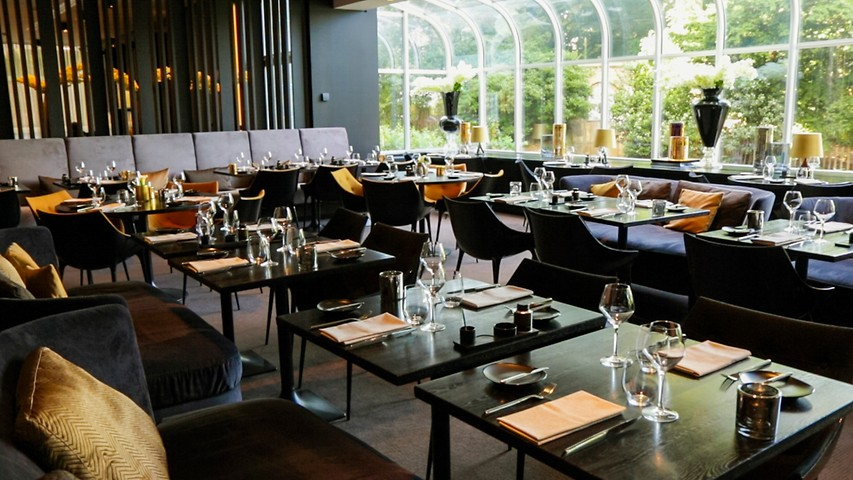

In [289]:
from IPython.display import Image
Image("https://file.videopolis.com/D/9dc9f4ba-0b2d-4cbb-979f-fee7be8a4198/8485.11521.brussels.the-hotel-brussels.amenity.restaurant-AD3WAP2L-13000-853x480.jpeg")

## Dataset Source : Kaggle (ZOMATO API DATA)


## <font color='red'>Features and their description</font>
- Restaurant Id: Unique id of every restaurant across various cities of the world
- Restaurant Name: Name of the restaurant 
- Country Code: Country in which restaurant is located 
- City: City in which restaurant is located 
- Address: Address of the restaurant
- Locality: Location in the city 
- Locality Verbose: Detailed description of the locality 
- Longitude: Longitude coordinate of the restaurant's location 
- Latitude: Latitude coordinate of the restaurant's location 
- Cuisines: Cuisines offered by the restaurant 
- Average Cost for two: Cost for two people in different currencies
- Currency: Currency of the country 
- Has Table booking: yes/no 
- Has Online delivery: yes/ no 
- Is delivering: yes/ no 
- Switch to order menu: yes/no 
- Price range: range of price of food 
- Aggregate Rating: Average rating out of 5 
- Stars: Number of Stars out of 5
- Rating Date: The Date the rating was given 
- Rating color: depending upon the average rating color 
- Rating text: text on the basis of rating of rating Votes: Number of ratings casted by people

# <font color='red'>Importing the Libraries and the Dataset</font>

In [311]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('C:/Users/viki4/Desktop/Zomato_Reviews_Final.csv')
dataset.head(10)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Longitude,Latitude,Cuisines,Average Cost for two,...,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Review,Liked
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City",121.027535,14.565443,"French, Japanese, Desserts",1100,...,No,No,No,3,5,Dark Green,Good,314,Wow... Loved this place.,Yes
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City",121.014101,14.553708,Japanese,1200,...,No,No,No,3,5,Dark Green,Bad,591,Crust is not good.,No
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,...,No,No,No,4,4,Green,Bad,270,Not tasty and the texture was just nasty.,No
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City",121.056475,14.585318,"Japanese, Sushi",1500,...,No,No,No,4,5,Dark Green,Good,365,Stopped by during the late May bank holiday of...,Yes
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City",121.057508,14.584450,"Japanese, Korean",1500,...,No,No,No,4,5,Dark Green,Good,229,The selection on the menu was great and so wer...,Yes
5,18189371,Din Tai Fung,162,Mandaluyong City,"Ground Floor, Mega Fashion Hall, SM Megamall, ...","SM Megamall, Ortigas, Mandaluyong City",121.056314,14.583764,Chinese,1000,...,No,No,No,3,4,Green,Bad,336,Now I am getting angry and I want my damn pho.,No
6,6300781,Buffet 101,162,Pasay City,"Building K, SM By The Bay, Sunset Boulevard, M...","SM by the Bay, Mall of Asia Complex, Pasay City",120.979667,14.531333,"Asian, European",2000,...,No,No,No,4,4,Green,Bad,520,Honeslty it didn't taste THAT fresh.),No
7,6301290,Vikings,162,Pasay City,"Building B, By The Bay, Seaside Boulevard, Mal...","SM by the Bay, Mall of Asia Complex, Pasay City",120.979333,14.540000,"Seafood, Filipino, Asian, European",2000,...,No,No,No,4,4,Green,Bad,677,The potatoes were like rubber and you could te...,No
8,6300010,Spiral - Sofitel Philippine Plaza Manila,162,Pasay City,"Plaza Level, Sofitel Philippine Plaza Manila, ...","Sofitel Philippine Plaza Manila, Pasay City",120.980090,14.552990,"European, Asian, Indian",6000,...,No,No,No,4,5,Dark Green,Good,621,The fries were great too.,Yes
9,6314987,Locavore,162,Pasig City,"Brixton Technology Center, 10 Brixton Street, ...",Kapitolyo,121.056532,14.572041,Filipino,1100,...,No,No,No,3,5,Dark Green,Good,532,A great touch.,Yes


# <font color='red'> Exploratory Data Analysis (Visualization)</font>


In [244]:
dataset['text length'] = dataset['Review'].apply(len)

In [245]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

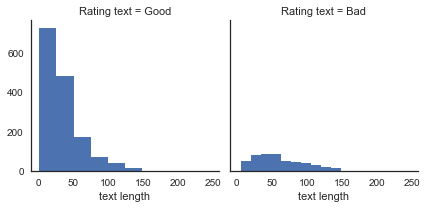

In [246]:
g = sns.FacetGrid(dataset,col='Rating text')
g.map(plt.hist,'text length')

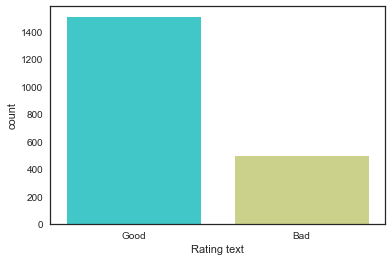

In [247]:
sns.countplot(x='Rating text',data=dataset,palette='rainbow')


In [251]:
df_CC = pd.read_excel('C:/Users/viki4/Downloads/Country-Code.xlsx')
df_CC.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [252]:
df_grp = dataset.groupby(['Country Code'], as_index=False).count()[['Country Code', 'Restaurant ID']]
df_grp.columns = ['Country Code', 'No of Restaurant']
res = df_grp.join(df_CC.set_index('Country Code'), on = 'Country Code')

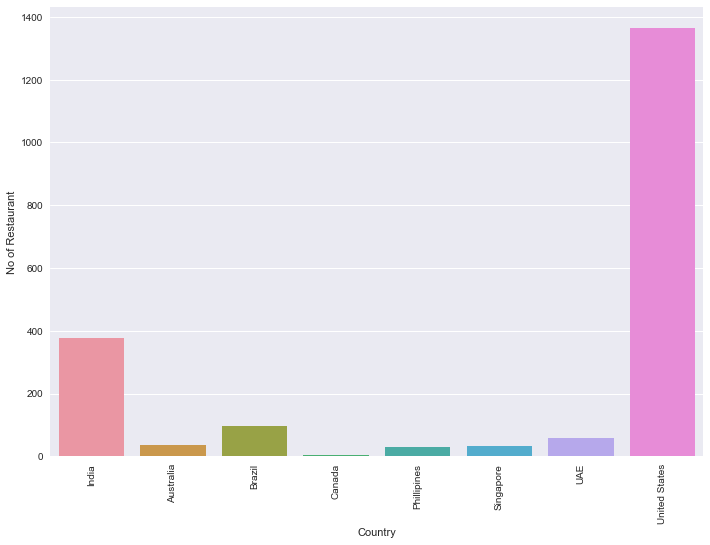

In [282]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(res['Country'], res['No of Restaurant'])
plt.xticks(rotation = 90)
plt.show()

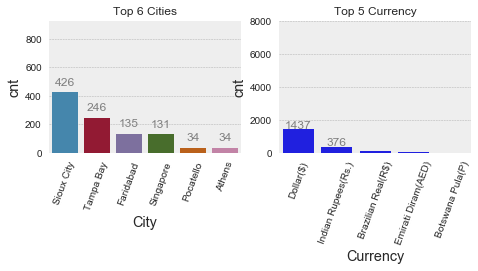

City #  91
Currency #  5
Country Code #  8


In [286]:
with plt.style.context('bmh'):
   
    cnt = dataset['Country Code'].value_counts().to_frame()
    ax = plt.subplot2grid((3,3),(2,0))
    cnt = dataset['City'].value_counts().reset_index()
    cnt.rename(columns = {'index':'City', 'City':'cnt'}, inplace = True)
    sns.barplot(x = 'City', y = 'cnt', data = cnt.head(6), ax = ax)
    ax.tick_params(axis='x', rotation=70)
    ax.set_title('Top 6 Cities', size = 12)
    ax.set_ylim([0, cnt['cnt'].head(1).values+500])
    for i, val in enumerate(cnt['cnt'].head(6)):
        ax.text(i, val+50, val, color = 'grey', ha = 'center')
        
    ax = plt.subplot2grid((3,3),(2,1))
    cnt = dataset['Currency'].value_counts().reset_index()
    cnt.rename(columns = {'index':'Currency', 'Currency':'cnt'}, inplace = True)
    sns.barplot(x = 'Currency', y = 'cnt', data =cnt.head(6), color = 'b', ax = ax)
    ax.set_title('Top 5 Currency', size = 12)
    ax.tick_params(axis='x', rotation=70)
    ax.set_ylim([0, 8000])
    for i, val in enumerate(cnt['cnt'].head(2)):
        ax.text(i, val+50, val, color = 'grey', ha = 'center')
    sns.despine(left=True, bottom=True)
    plt.show()

    
    
print('City # ', dataset['City'].nunique())
print('Currency # ', dataset['Currency'].nunique())
print('Country Code # ', dataset['Country Code'].nunique())    

# <font color='red'>Data Cleaning</font>

In [320]:
# Deleting the unwanted columns

del dataset["Stars"]
del dataset["Rating Date"]
del dataset["Rating color"]

dataset.head(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Longitude,Latitude,Cuisines,Average Cost for two,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating text,Votes,Review,Liked
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City",121.027535,14.565443,"French, Japanese, Desserts",1100,...,Yes,No,No,No,3,5,Good,314,Wow... Loved this place.,Yes
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City",121.014101,14.553708,Japanese,1200,...,Yes,No,No,No,3,5,Bad,591,Crust is not good.,No
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,...,Yes,No,No,No,4,4,Bad,270,Not tasty and the texture was just nasty.,No
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City",121.056475,14.585318,"Japanese, Sushi",1500,...,No,No,No,No,4,5,Good,365,Stopped by during the late May bank holiday of...,Yes
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City",121.057508,14.584450,"Japanese, Korean",1500,...,Yes,No,No,No,4,5,Good,229,The selection on the menu was great and so wer...,Yes


# <font color='red'>Data Pre-processing</font>

In [293]:
cleanup_cols = {"Has Online delivery":{"No": 0, "Yes": 1},
                "Has Table booking":{"No": 0, "Yes": 1},
                "Is delivering now":{"No": 0, "Yes": 1},
                "Liked":{"No":0, "Yes":1},
                "Switch to order menu":{"No": 0, "Yes": 1}}


dataset.replace(cleanup_cols, inplace=True)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Longitude,Latitude,Cuisines,Average Cost for two,...,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Review,Liked,text length
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City",121.027535,14.565443,"French, Japanese, Desserts",1100,...,0,0,3,5,Dark Green,Good,314,Wow... Loved this place.,1,24
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City",121.014101,14.553708,Japanese,1200,...,0,0,3,5,Dark Green,Bad,591,Crust is not good.,0,18
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,...,0,0,4,4,Green,Bad,270,Not tasty and the texture was just nasty.,0,41
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City",121.056475,14.585318,"Japanese, Sushi",1500,...,0,0,4,5,Dark Green,Good,365,Stopped by during the late May bank holiday of...,1,87
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City",121.057508,14.584450,"Japanese, Korean",1500,...,0,0,4,5,Dark Green,Good,229,The selection on the menu was great and so wer...,1,59
5,18189371,Din Tai Fung,162,Mandaluyong City,"Ground Floor, Mega Fashion Hall, SM Megamall, ...","SM Megamall, Ortigas, Mandaluyong City",121.056314,14.583764,Chinese,1000,...,0,0,3,4,Green,Bad,336,Now I am getting angry and I want my damn pho.,0,46
6,6300781,Buffet 101,162,Pasay City,"Building K, SM By The Bay, Sunset Boulevard, M...","SM by the Bay, Mall of Asia Complex, Pasay City",120.979667,14.531333,"Asian, European",2000,...,0,0,4,4,Green,Bad,520,Honeslty it didn't taste THAT fresh.),0,37
7,6301290,Vikings,162,Pasay City,"Building B, By The Bay, Seaside Boulevard, Mal...","SM by the Bay, Mall of Asia Complex, Pasay City",120.979333,14.540000,"Seafood, Filipino, Asian, European",2000,...,0,0,4,4,Green,Bad,677,The potatoes were like rubber and you could te...,0,111
8,6300010,Spiral - Sofitel Philippine Plaza Manila,162,Pasay City,"Plaza Level, Sofitel Philippine Plaza Manila, ...","Sofitel Philippine Plaza Manila, Pasay City",120.980090,14.552990,"European, Asian, Indian",6000,...,0,0,4,5,Dark Green,Good,621,The fries were great too.,1,25
9,6314987,Locavore,162,Pasig City,"Brixton Technology Center, 10 Brixton Street, ...",Kapitolyo,121.056532,14.572041,Filipino,1100,...,0,0,3,5,Dark Green,Good,532,A great touch.,1,14


# <font color='red'>Natural Language Processing</font>

In [144]:
# Cleaning the texts
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\viki4\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [145]:
corpus = []
for i in range(0,2001):
    review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()  # Taking roots of different versions of the same word; 
                          # Not to have too many words in the end; 
                          # To regroup same versions of the words;
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [313]:
corpus

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place worth time let alon vega',
 'like',
 'burritto blah',
 'food amaz',
 'servic also cute',
 'could care less interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'like final blow',
 'hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm sever run around like total overwhelm',
 'worst salmon sashimi',
 'also combo like burger fri beer decent deal',
 'like final blow',
 'found place accid could

In [294]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1500)
X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:, 21].values

In [314]:
dataset_liked = pd.read_csv('C:/Users/viki4/Desktop/Zomato_Reviews_Final_Liked.csv')
dataset_liked["Restaurant ID"].head(10)

0     6317637
1     6318506
2     6314302
3     6300010
4     6314987
5     6309903
6     6310470
7    18182702
8     6310406
9     6600681
Name: Restaurant ID, dtype: int64

# <font color='red'>Classification</font>

In [204]:
X = dataframe_final.iloc[:,[15,16]].values
y = dataframe_final.iloc[:,21].values

In [207]:
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [209]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

## We will train our data on different classification models to check which model gives us the maximum accuracy
1. LDA
2. Gaussian NB
3. Logistic Regression
4. KNN
5. Random Forest

In [213]:
# Import necessary models from scikit_learn

from sklearn import model_selection
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [211]:
# Prepare configuration for cross validation test harness
seed = 7

In [214]:
# Prepare models

models = []
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('NB', GaussianNB()))
models.append(('LOG',LogisticRegression()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('RF',RandomForestClassifier()))

In [215]:
# Evaluate each model

results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LDA: 0.725729 (0.237966)
NB: 0.731726 (0.260818)
LOG: 0.729729 (0.237499)
KNN: 0.584704 (0.149398)
RF: 0.732724 (0.261878)


## <font color='blue'>Naive Bayes</font>

In [217]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None)

In [218]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [219]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 24,  73],
       [ 17, 287]], dtype=int64)

In [220]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7755610972568578

# <font color='blue'>Random Forest Classification</font>

In [221]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [222]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [223]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 11,  86],
       [  9, 295]], dtype=int64)

In [225]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7630922693266833

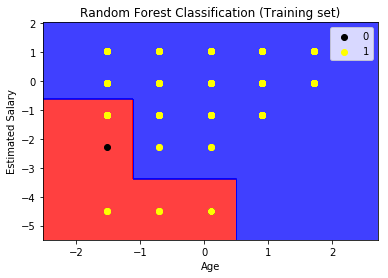

In [233]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'Blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('Black', 'yellow'))(i), label = j)
plt.title('Random Forest Classification (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

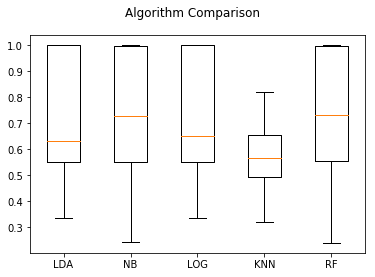

In [216]:
# Boxplot algorithm comparison

fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# <font color='red'>Sentiment Analysis</font>

In [255]:
import json
from pandas.io.json import json_normalize


In [256]:
import textblob as tb
from textblob import TextBlob

In [257]:
!python -m textblob.download_corpora

[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\viki4\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\viki4\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\viki4\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\viki4\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to
[nltk_data]     C:\Users\viki4\AppData\Roaming\nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\viki4\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!

In [258]:
reviews=dataframe_final['Review']

In [259]:
# Cleaning the texts
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\viki4\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [260]:
for i in range(0, 2000):
    review_clean = re.sub('[^a-zA-Z]', ' ', dataframe_final['Review'][i])
    review_clean = review_clean.lower()
    review_clean = review_clean.split()
    ps = PorterStemmer()
    review_clean = [ps.stem(word) for word in review_clean if not word in set(stopwords.words('english'))]
    review_clean = ' '.join(review_clean)
    corpus.append(review_clean)

In [261]:
#for fetching all reviews
#list=[]
#list= dataframe_final['Review']
wordstring = corpus[0]

In [262]:
n=1
while n < 2000:
    wordstring += corpus[n]
    n=n+1

In [263]:
wordstring #displays all reviews combined

'wow love placecrust goodtasti textur nastistop late may bank holiday rick steve recommend loveselect menu great priceget angri want damn phohoneslti tast freshpotato like rubber could tell made ahead time kept warmerfri greatgreat touchservic promptwould go backcashier care ever say still end wayyy overprtri cape cod ravoli chicken cranberri mmmmdisgust pretti sure human hairshock sign indic cashhighli recommendwaitress littl slow servicplace worth time let alon vegalikeburritto blahfood amazservic also cutecould care less interior beautiperformright red velvet cake ohhh stuff goodlike final blowhole wall great mexican street taco friendli stafftook hour get food tabl restaur food luke warm sever run around like total overwhelmworst salmon sashimialso combo like burger fri beer decent deallike final blowfound place accid could happierseem like good quick place grab bite familiar pub food favor look elsewheroveral like place lotredeem qualiti restaur inexpensampl portion good pricepoor

In [264]:
wordlist = wordstring.split()
wordlist

['wow',
 'love',
 'placecrust',
 'goodtasti',
 'textur',
 'nastistop',
 'late',
 'may',
 'bank',
 'holiday',
 'rick',
 'steve',
 'recommend',
 'loveselect',
 'menu',
 'great',
 'priceget',
 'angri',
 'want',
 'damn',
 'phohoneslti',
 'tast',
 'freshpotato',
 'like',
 'rubber',
 'could',
 'tell',
 'made',
 'ahead',
 'time',
 'kept',
 'warmerfri',
 'greatgreat',
 'touchservic',
 'promptwould',
 'go',
 'backcashier',
 'care',
 'ever',
 'say',
 'still',
 'end',
 'wayyy',
 'overprtri',
 'cape',
 'cod',
 'ravoli',
 'chicken',
 'cranberri',
 'mmmmdisgust',
 'pretti',
 'sure',
 'human',
 'hairshock',
 'sign',
 'indic',
 'cashhighli',
 'recommendwaitress',
 'littl',
 'slow',
 'servicplace',
 'worth',
 'time',
 'let',
 'alon',
 'vegalikeburritto',
 'blahfood',
 'amazservic',
 'also',
 'cutecould',
 'care',
 'less',
 'interior',
 'beautiperformright',
 'red',
 'velvet',
 'cake',
 'ohhh',
 'stuff',
 'goodlike',
 'final',
 'blowhole',
 'wall',
 'great',
 'mexican',
 'street',
 'taco',
 'friendli',


In [265]:
blob=TextBlob(wordstring)


In [266]:
Fos=blob.tags

In [267]:
labels=['Words','Figure of Speech']
df1= pd.DataFrame.from_records(Fos, columns=labels)
df1.head()


,Words,Figure of Speech
0,wow,NN
1,love,VB
2,placecrust,NN
3,goodtasti,NN
4,textur,JJ


In [268]:
blob.sentences[0].words

WordList(['wow', 'love', 'placecrust', 'goodtasti', 'textur', 'nastistop', 'late', 'may', 'bank', 'holiday', 'rick', 'steve', 'recommend', 'loveselect', 'menu', 'great', 'priceget', 'angri', 'want', 'damn', 'phohoneslti', 'tast', 'freshpotato', 'like', 'rubber', 'could', 'tell', 'made', 'ahead', 'time', 'kept', 'warmerfri', 'greatgreat', 'touchservic', 'promptwould', 'go', 'backcashier', 'care', 'ever', 'say', 'still', 'end', 'wayyy', 'overprtri', 'cape', 'cod', 'ravoli', 'chicken', 'cranberri', 'mmmmdisgust', 'pretti', 'sure', 'human', 'hairshock', 'sign', 'indic', 'cashhighli', 'recommendwaitress', 'littl', 'slow', 'servicplace', 'worth', 'time', 'let', 'alon', 'vegalikeburritto', 'blahfood', 'amazservic', 'also', 'cutecould', 'care', 'less', 'interior', 'beautiperformright', 'red', 'velvet', 'cake', 'ohhh', 'stuff', 'goodlike', 'final', 'blowhole', 'wall', 'great', 'mexican', 'street', 'taco', 'friendli', 'stafftook', 'hour', 'get', 'food', 'tabl', 'restaur', 'food', 'luke', 'warm',

In [269]:
blob.noun_phrases
nouns=[]

In [270]:
for word,tag in blob.tags:
    if tag == 'NN':
        nouns.append(word)
        
        
#print(nouns) 

In [271]:
counter = {}
for i in nouns: 
    counter[i] = counter.get(i, 0) + 1
counter
POPULARwords= sorted([ (freq,word) for word, freq in counter.items() ], reverse=True)[:30]

In [272]:
labels=['Count','Words']
popular_words= pd.DataFrame.from_records(POPULARwords, columns=labels)
popular_words.head()

,Count,Words
0,191,food
1,79,place
2,51,time
3,26,restaur
4,21,servic


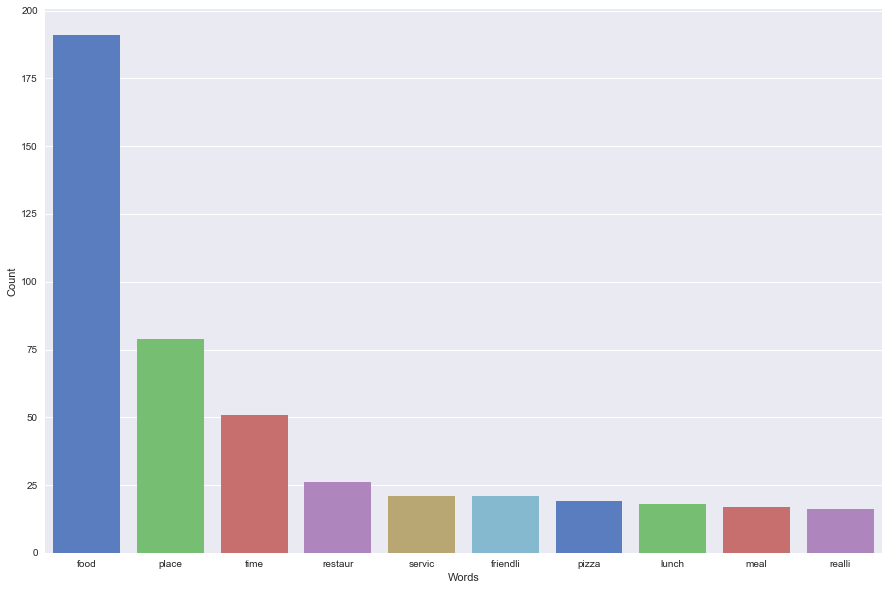

In [273]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 10)) # defining the size of figure
sns.barplot(x='Words', y='Count', data=popular_words.head(10),palette='muted',
 ax=ax) 
plt.show(fig)

# <font color='blue'>Verbs</font>

In [274]:
verbs=[]

In [275]:
for word,tag in blob.tags:
    if tag == 'VB':
        verbs.append(word)
        

In [276]:
counter = {}
for i in verbs: 
    counter[i] = counter.get(i, 0) + 1
counter

POPULARverbs= sorted([ (freq,word) for word, freq in counter.items() ], reverse=True)[:30]

In [277]:
labels=['Count','Words']
popular_verbs= pd.DataFrame.from_records(POPULARverbs, columns=labels)
popular_verbs.head()

,Count,Words
0,21,go
1,15,get
2,7,recommend
3,6,love
4,5,find


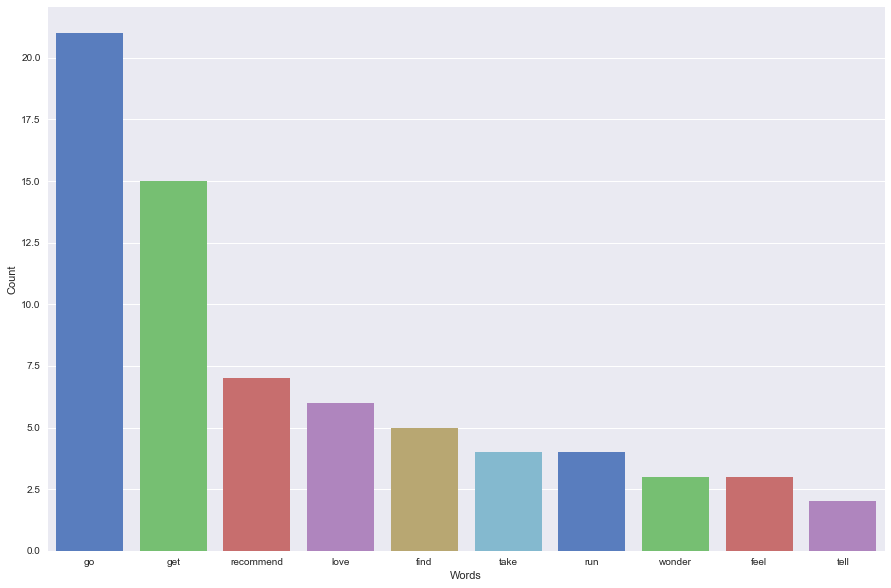

In [278]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 10)) # defining the size of figure
sns.barplot(x='Words', y='Count', data=popular_verbs.head(10),palette='muted',
 ax=ax) 
plt.show(fig)

In [279]:
blob.sentiment 

Sentiment(polarity=0.27729345535133143, subjectivity=0.5232432063428488)

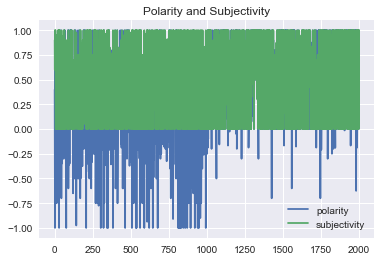

In [280]:
import matplotlib.pyplot as plot
%matplotlib inline
polarity=[]
subj=[]
for t in reviews:
    tx=TextBlob(t)
    polarity.append(tx.sentiment.polarity)
    subj.append(tx.sentiment.subjectivity)

    
poltweet= pd.DataFrame({'polarity':polarity,'subjectivity':subj})   
poltweet.plot(title='Polarity and Subjectivity')

# <font color='red'>Regression</font>

# <font color='blue'>Multi Linear Regression</font>

In [126]:
dataframe_final=dataset

cleanup_nums = {"Has Online delivery":{"No": 0, "Yes": 1},
                "Has Table booking":{"No": 0, "Yes": 1},
                "Is delivering now":{"No": 0, "Yes": 1},
                "Liked":{"No":0, "Yes":1},
                "Switch to order menu":{"No": 0, "Yes": 1}}


dataframe_final.replace(cleanup_nums, inplace=True)

In [128]:
Indp_X=dataframe_final.iloc[:,[9,11,12,13,14,15,16]].values
Dep_y = dataframe_final.iloc[:,21].values


In [130]:
# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Indp_X, Dep_y, test_size = 0.2, random_state = 0)


In [302]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [303]:
# Predicting the Test Set results
y_pred=regressor.predict(X_test)

In [310]:
y_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [305]:
regressor.score(X_train, y_train)

0.76875

In [306]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7605985037406484

# <font color='blue'> Support Vector Regression</font>


In [137]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.svm import SVR
svmregressor = SVR(kernel = 'rbf')
svmregressor.fit(X_train, y_train)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [138]:
# Predicting the Test Set results
svmy_pred=regressor.predict(X_test)

In [143]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,svmy_pred)


0.7755610972568578

# <font color='red'>Conclusion and Future Scope</font>

In [308]:
dataset_liked = pd.read_csv('C:/Users/viki4/Desktop/Zomato_Reviews_Final_Liked.csv')
rest=[]
rest.insert(1,dataset_liked["Restaurant Name"])
for i in dataset_liked:
        rest.append(dataset_liked["Restaurant ID"])
rest

[0                               Le Petit Souffle
 1                                           Ooma
 2                                    Sambo Kojin
 3       Spiral - Sofitel Philippine Plaza Manila
 4                                       Locavore
 5                               Silantro Fil-Mex
 6                                     Guevarra's
 7                       Nonna's Pasta & Pizzeria
 8                  The Food Hall by Todd English
 9                                    Chez Michou
 10                           Cafí© Daniel Briand
 11                      Casa do Biscoito Mineiro
 12                                         Maori
 13                                    Sushi Loko
 14                                Sandubas Cafí©
 15                                      Rovereto
 16                                      Taco Pep
 17                                    Coco Bambu
 18                                        Taypíç
 19                                       Manzuíç



#### I'm planning on sending the feedback from the above analysis to the owners of the restaurants, using which they can improve their service, inturn maximizing their profits.